In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = yf.download("EURUSD=X GBPUSD=X AUDUSD=X NZDUSD=X JPYUSD=X CL=F GC=F BZ=F",
                   start = '2021-01-01',end='2022-12-14',period='1d')

[*********************100%***********************]  8 of 8 completed


In [33]:
df= data['Adj Close']

In [34]:
df.stack().groupby(level=1).head(1)

Date                
2021-01-01  AUDUSD=X       0.770297
            EURUSD=X       1.218027
            GBPUSD=X       1.367301
            JPYUSD=X       0.009687
            NZDUSD=X       0.718200
2021-01-04  BZ=F          51.090000
            CL=F          47.619999
            GC=F        1944.699951
dtype: float64

In [35]:
df = df.fillna(method='ffill')
df

,AUDUSD=X,BZ=F,CL=F,EURUSD=X,GBPUSD=X,GC=F,JPYUSD=X,NZDUSD=X
Date,,,,,,,,
2021-01-01,0.770297,NaN,NaN,1.218027,1.367301,NaN,0.009687,0.718200
2021-01-04,0.771230,51.090000,47.619999,1.225070,1.368420,1944.699951,0.009686,0.719839
2021-01-05,0.767100,53.599998,49.930000,1.225160,1.357160,1952.699951,0.009697,0.717829
2021-01-06,0.776600,54.299999,50.630001,1.230027,1.362955,1906.900024,0.009739,0.725689
2021-01-07,0.781700,54.380001,50.830002,1.234111,1.362528,1912.300049,0.009706,0.730578
...,...,...,...,...,...,...,...,...
2022-12-07,0.669882,77.169998,72.010002,1.046901,1.213301,1785.500000,0.007305,0.632439
2022-12-08,0.672700,76.150002,71.459999,1.051326,1.221240,1788.699951,0.007332,0.635409
2022-12-09,0.677650,76.099998,71.019997,1.055966,1.223601,1798.099976,0.007320,0.637861


In [36]:
df.pct_change().corr()

,AUDUSD=X,BZ=F,CL=F,EURUSD=X,GBPUSD=X,GC=F,JPYUSD=X,NZDUSD=X
AUDUSD=X,1.000000,0.124322,0.111565,0.658082,0.717578,0.127046,0.419633,0.918931
BZ=F,0.124322,1.000000,0.929955,-0.051252,0.028587,0.217257,0.025914,0.083647
CL=F,0.111565,0.929955,1.000000,-0.052341,0.010115,0.231796,0.029978,0.063373
EURUSD=X,0.658082,-0.051252,-0.052341,1.000000,0.744131,0.087590,0.449950,0.667663
GBPUSD=X,0.717578,0.028587,0.010115,0.744131,1.000000,0.088645,0.439811,0.723559
GC=F,0.127046,0.217257,0.231796,0.087590,0.088645,1.000000,0.049109,0.104053
JPYUSD=X,0.419633,0.025914,0.029978,0.449950,0.439811,0.049109,1.000000,0.456016
NZDUSD=X,0.918931,0.083647,0.063373,0.667663,0.723559,0.104053,0.456016,1.000000


In [37]:
df_return = df.pct_change()

In [38]:
df_ret = df_return.loc[~df_return.isnull().sum(1).astype(bool)]

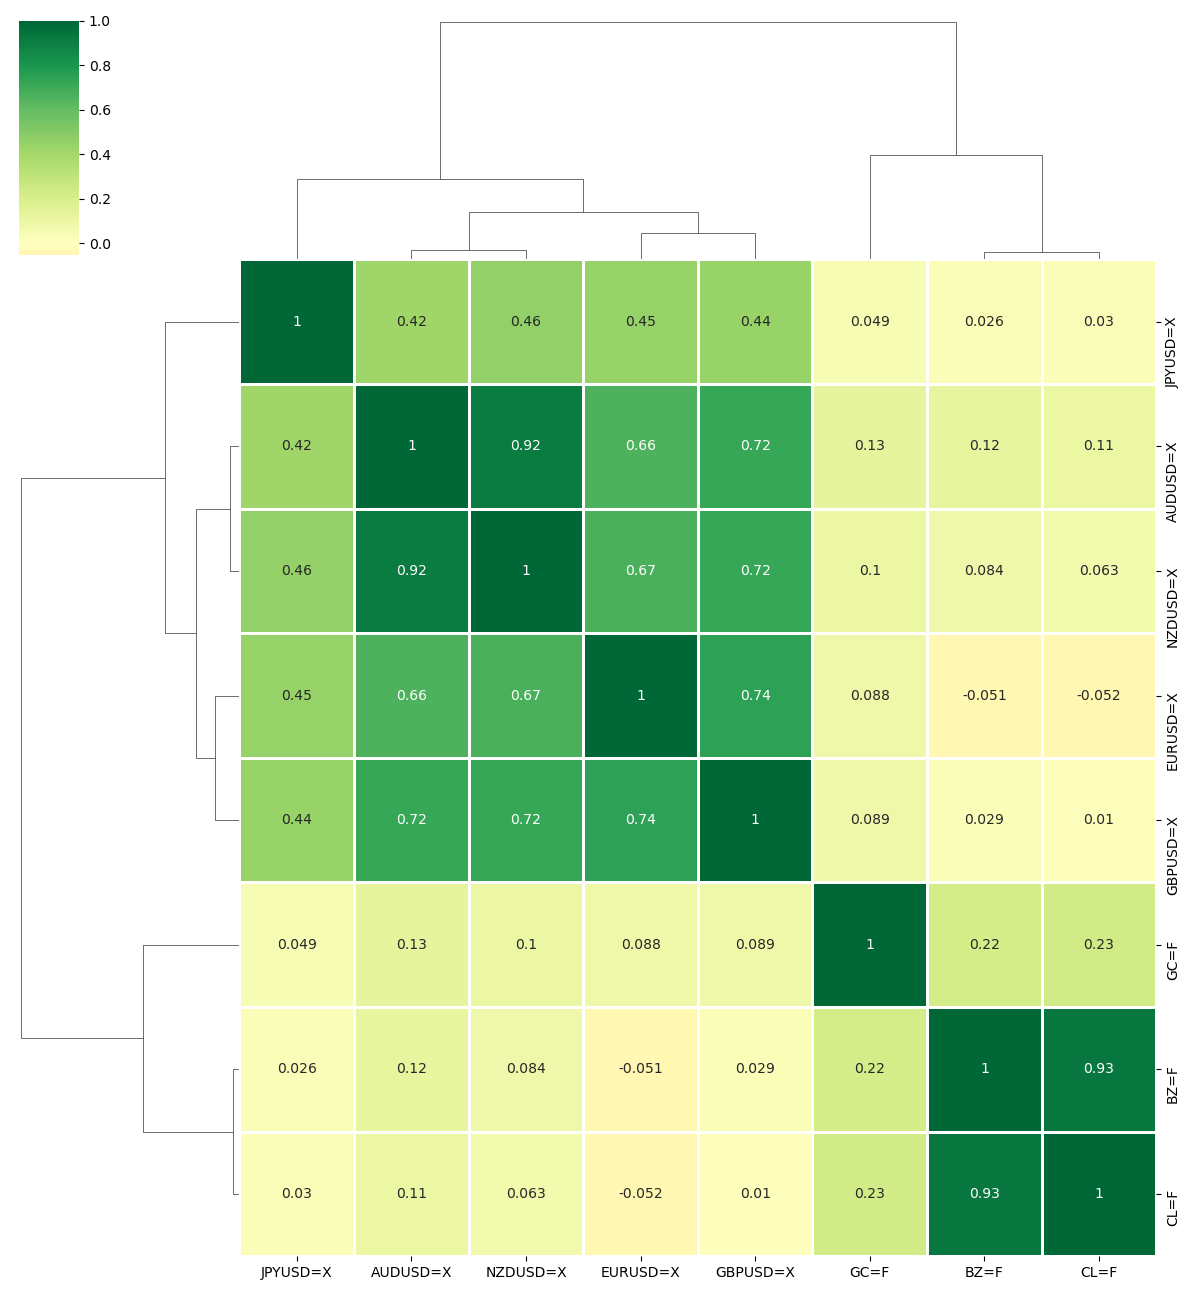

In [39]:
g = sns.clustermap(df_ret.corr(), method='ward', center = 0.0, cmap="RdYlGn",
                   dendrogram_ratio=(.2, .2),
                   linewidths=.75, figsize=(12, 13),
                   annot = True)
# correlation 0.5 is important point

In [40]:
group1 = df[['AUDUSD=X', 'NZDUSD=X','GBPUSD=X', 'EURUSD=X']]
group2 = df[['BZ=F','CL=F']]


In [46]:
group1_geo_ret = (group1.pct_change()+1).cumprod()
# cumsum is normal return like plus only return and plot

# cumprod = cuculrative product 

In [42]:
group1.pct_change()+1


,AUDUSD=X,NZDUSD=X,GBPUSD=X,EURUSD=X
Date,,,,
2021-01-01,NaN,NaN,NaN,NaN
2021-01-04,1.001211,1.002282,1.000818,1.005782
2021-01-05,0.994645,0.997208,0.991772,1.000074
2021-01-06,1.012384,1.010951,1.004270,1.003973
2021-01-07,1.006567,1.006736,0.999687,1.003320
...,...,...,...,...
2022-12-07,0.998660,1.000283,0.995125,0.997341
2022-12-08,1.004206,1.004696,1.006543,1.004226
2022-12-09,1.007359,1.003859,1.001933,1.004414


<AxesSubplot:xlabel='Date'>

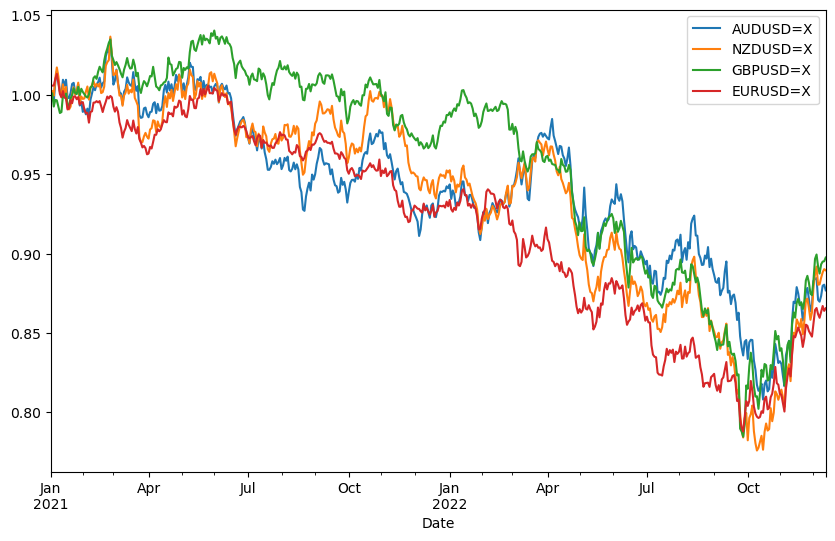

In [43]:
group1_geo_ret.plot(figsize=(10,6))


In [44]:
group2_geo_ret = (group2.pct_change()+1).cumprod()


<AxesSubplot:xlabel='Date'>

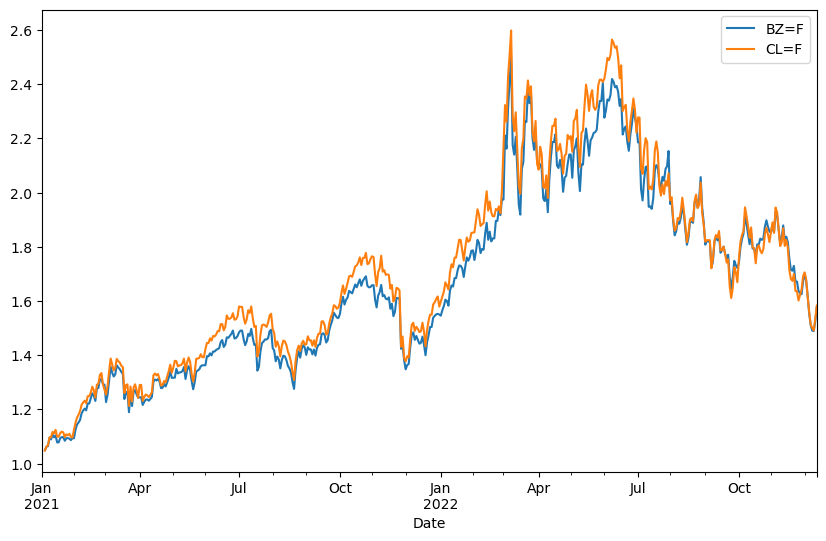

In [45]:
group2_geo_ret.plot(figsize=(10,6))
